In [109]:
import matplotlib.pyplot as plt
import numpy as np
import re
import sys
sys.path.append('..')
from Common.utils import numerical_grad_nd

In [110]:
with open('arti_traj_0.dat', 'r') as F:
    data = []
    for line in F:
        line_c = re.split(' |\n', line)
        line_c = list(map(float, line_c[:-1]))
        line_c = np.array(line_c, dtype=float)
        data.append(line_c.reshape(1,-1))

In [111]:
data = np.concatenate(data)

In [112]:
len(data)

11001

In [113]:
time = data[:,0]
q_m = data[:, 1:8]
q_ref = data[:,8:15]
qd_m = data[:, 15:22]
aq = data[:, 22:29]
res_u = data[:, 29:36]
G = data[:, 36:43]
C = data[:,43:50]
M = data[:,50:99]
qd_ref = data[:, 99:106]

qdd_df = numerical_grad_nd(qd_m)
qdd_ref = numerical_grad_nd(qd_ref)

tau = []
for i in range(len(M)):
    temp = M[i, :].reshape(7,7) @ aq[i,:].reshape(7,1) + C[i,:].reshape(7,1) + G[i,:].reshape(7,1) 
    tau.append(temp)
tau = np.concatenate(tau, axis=1).T

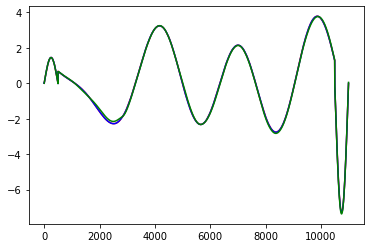

In [129]:
joint = 6
# plt.plot(res_u[:, joint])
plt.plot(qdd_ref[:,joint], '-r')
plt.plot(qdd_df[:,joint], '-b')
plt.plot(aq[:, joint],'-g')

In [84]:
A = np.concatenate([np.zeros([7,7]), np.eye(7)], axis=1)
A = np.concatenate([A, np.zeros_like(A)], axis=0)
B = np.concatenate([np.zeros([7,7]), np.eye(7)], axis=0)
C = np.eye(14)
D = np.zeros([14,7])
import control
from control.matlab import c2d
sys = control.StateSpace(A,B,C,D)
d_sys = c2d(sys, Ts=0.001)
A = d_sys.A
B = d_sys.B
C = d_sys.C
D = d_sys.D

In [89]:
start = 1000
x = np.concatenate([q_m, qd_m], axis=1)
x0 = x[start:start+1,:].reshape(-1,1)
res = [x0]
for i in range(start,start+1000):
    temp = A @ x0.reshape(-1,1) + B @ qdd_df[i:i+1, :].reshape(-1,1)
    x0 = temp
    res.append(temp)
res = np.concatenate(res, axis=1).T

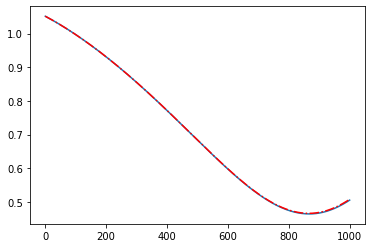

In [90]:
plt.plot(res[:,4])
plt.plot(x[start:start+1000,4], '-.r')